<a href="https://colab.research.google.com/github/AanchalA/Quantum-Machine-Learning/blob/main/QuantumClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Quantum Machine Learning, Sairaj Raval](https://www.youtube.com/watch?v=Zt8OnwXOGjI&ab_channel=SirajRaval)

Reference Links:

*   [RSA Algorithm in Cryptography: The algorithm that BitCoin uses for generating public and private key pairs.](https://www.geeksforgeeks.org/rsa-algorithm-cryptography/)

*   [Quantum Circutis](https://medium.com/@adubey40/quantum-circuit-d53b5485ef91)

*   [** Learn Quantum Computation using IBM's Qiskit](https://qiskit.org/textbook/what-is-quantum.html)

*   [** Quantum Gates: CNOT Gate](https://towardsdatascience.com/towards-einsteins-spooky-action-at-a-distance-c32ca0148f8f)


GITHUB REPOS:
*   [Quantum Computing](https://github.com/llSourcell/quantum_computing)
*   [QML Jupyter Notebook](https://github.com/llSourcell/quantum_machine_learning_LIVE/blob/master/Demo.ipynb)
*   [Quantum Machine Learning Theory](https://github.com/llSourcell/quantum_machine_learning)
*   [Quantum Neural Networks](https://github.com/llSourcell/quantum-neural-networks)

VIDEOS:
*   [Quantum Machine Learning](https://www.youtube.com/watch?v=Lbndu5EIWvI&t=714s&ab_channel=%E6%85%B6%E6%87%89%E7%BE%A9%E5%A1%BEKeioUniversity)

*   [Video: What is Shor's factoring algorithm?](https://www.youtube.com/watch?v=hOlOY7NyMfs)

*   [Video: Quantum Circutis](https://www.youtube.com/watch?v=_p7i2v21Ys8)

# Prime Factorization

## Algorithm 1: The Sieve of Eratosthenes Algorithm
[Sieve of Eratosthenes Algorithm](https://www.geeksforgeeks.org/sieve-of-eratosthenes/)


1. Create a list of consecutive integers from 2 to n: (2, 3, 4, …, n).
2. Initially, let p equal 2, the first prime number.
3. Starting from p2, count up in increments of p and mark each of these numbers greater than or equal to p2 itself in the list. These numbers will be p(p+1), p(p+2), p(p+3), etc..
4. Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this number (which is the next prime), and repeat from step 3.



In [ ]:
import sys

def factorizer(n): #'n' - number we want to find all the prime factors of
    v = []
    n = int(n)
    out = '' # Empty char array. Will be filled with all the prime factors

    for i in range(1000): # 1000 - arbitrary number
        v.append(1) # Initialize the 1000 numbers as empty numbers

    for j in range(2, n): # Creating a list of all the multiples of 2 below 'n'
        if v[j]:    # here, j will increment in factors of 2
            k = 2   # Initially prime number 'k' = 2
            while k * j <= n:
                v[k * j] = 0 # Setting 'off' all the indexes in v that are multiples of 2
                k += 1

    for i in range(2, n):
        if v[i]:
            out += str(i) + ' '

    return out

In [ ]:
factorizer(n=int(9))
## This method works fine for samll numbers, but for large numbers like 9999999999999999999, there is going to be
# a stack overflow.
# Here we get the Error: 'List assignment index out of range', because we have 1000 as the limit.
# But even if we increase the limit, the operation will take a very very very very long time.
# The Sieve of Eratosthenes is not a very time efficient algotithm.
# The best approach to improve time complexity is to use 'Quantum'!!

'2 3 5 7 '

## Algorithm 2: Shor's Algorithm
[Shor's algorithm](https://quantiki.org/wiki/shors-factoring-algorithm) is a quantum computer algorithm for integer factorization


1. Pick a random number 1 < a < N
2. Compute gcd(a, N), the greatest common divisor of a and N. This may be done using the Euclidean algorithm.
3. If gcd(a, N) ≠ 1, then this number is a non-trivial factor of N, so we are done.
4. Otherwise, use the **quantum period-finding subroutine** (below) to find r, which denotes the period of the following function:

`f(x) = a^x mod N`

This is the order r of a in the group (ZN)^×, which is the smallest positive integer r for which
    `f(x+r) = f(x)`,
     or
    `f(x+r) = a^(x+r) mod N ≡ a^x mod N`.
By Euler's Theorem, r divides φ(N), where φ denotes Euler's totient function.
5. If r is odd, then go back to step 1.
6. If a^(r/2) ≡ −1(mod N), then go back to step 1.
7. Otherwise, both gcd(a^(r/2) + 1, N) and gcd(a^(r/2) − 1, N)are nontrivial factors of N, so we are done.

---

For example: Given N = 15 , a = 7, and r = 4, we have gcd(7^2 ± 1, 15) = gcd(49 ± 1, 15), where gcd(48, 15) = 3 and gcd(50, 15) = 5. For N that is a product of two distinct primes, p and q, the value of φ(N) is just `N − p − q + 1`, which for N = 15 is 8, and divides 8.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Hadamard Gate: It's a quantum gate. It uses a specifie type of linear algebra, "Hilbert Algebra".
## Hadamard Gate is a matrix of values that when applied (i.e. matrix multiplication) to some quantum state vector ('ket'
## in quantum mechanics), it's going to turn it into a super-imposed state of numbers.

## Super-posistion - is a possibility space of different values across 'timelines'.

def Hadamard(n):
    """
    Input: integer 'n'
    Output: After applying the hadamard gate, we will get a possibility space of the period for the quantum fourier
            transform of what all of the possible values are.
    """

    def Hn(H = np.array([[1, 1], [1, -1]], dtype = np.complex64), n = n):
        if n > 1:
            return Hn(H = np.kron(np.array([[1, 1], [1, -1]], dtype = np.complex64), H), n = n - 1)
        return H
    return Hn(n = n)

In [ ]:
# Quantum Fourier Transform (QFT) is a Quantm Circuit
def QFT(t):
    """
    Input: 't' is a 'Quantum Input Vector' defined using Numpy.
    Output: QFT uses the Hadamard gate to compute the super-position.
    """

    Q = np.zeros(shape = (2 ** t, 2 ** t), dtype = np.complex64)
    N = 2 ** t

    for i in range(N):
        for j in range(N):
            Q[i][j] = np.exp(np.pi * 2j * ((i * j) % N) / N)
    return Q

In [ ]:
## Getting the list of prime numbers.

N = 21
t = 9
H = Hadamard(t)

reg1 = np.zeros(shape = (2 ** t), dtype = np.complex64)
reg2 = np.zeros(shape = (2 ** t), dtype = np.complex64)

reg1[0] = 1
reg1 = H.dot(reg1)

for i in range(2 ** t):
    reg2[i] = 2 ** i % N

r = reg2[0]

for i in range(2 ** t):
    if reg2[i] != r:
        reg1[i] = 0

Q = QFT(9)
reg1 = np.linalg.inv(Q).dot(reg1)

In [ ]:
# print(abs(reg1))
print(abs(reg1[0]))
print(abs(reg1[85]))
print(abs(reg1[86]))

0.16796875
0.13848211
0.06826273


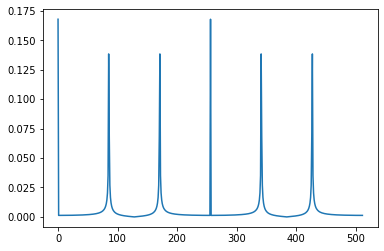

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(abs(reg1))
fig.savefig('plot.png')

## Algorithm 3: Quantum Neural Network
---
QUANTUM CIRCUITS:

In quantum information theory, a quantum circuit is a model for quantum computation in which a computation is a sequence of quantum gates, which are reversible transformations on a quantum mechanical analog of an n-bit register. This analogous structure is referred to as an n-qubit register. The graphical depiction of quantum circuit elements is described using a variant of the Penrose graphical notation.

---
KERNEL METHODS:

In machine learning, kernel methods are a class of algorithms for pattern analysis, whose best known member is the support vector machine. The general task of pattern analysis is to find and study general types of relations in datasets.

In [ ]:
"""
Input: A vector 'f'
Processing: f -> Quantum Circuit (QC) -> <f, g>
Output: <f, g>
"""

In [ ]:
!pip install pennylane >> /dev/null

In [ ]:
import pennylane as qml
from pennylane import numpy as np

In [ ]:
## Creating a Quantum Machine Learning Device
dev1 = qml.device("default.qubit", wires = 1)

In [ ]:
@qml.qnode(dev1)
def circuit(params):
    qml.RX(params[0], wires = 0)
    qml.RY(params[1], wires = 0)
    qml.RX(params[0], wires = 0)
    qml.RY(params[1], wires = 0)
    return qml.expval(qml.PauliZ(0))

In [ ]:
print (circuit([0.54, 0.12]))

0.45039465275606094


In [ ]:
def cost(x):
    return(circuit(x))

In [ ]:
init_params = np.array([0.011, 0.012])
print (cost(init_params))

0.9994700584297429


In [ ]:
opt = qml.GradientDescentOptimizer(stepsize = 0.4)

# Set number of steps
steps = 100

# Set the initial parameter values
params = init_params

In [ ]:
for i in range(steps):
    # Updating the circuit parameters
    params = opt.step(cost, params)

    if (i + 1) % 5 == 0:
        print ("Cost after steps {:5d}: {: .7f}".format(i + 1, cost(params)))

print ("Optimized Rotation Angles: {}".format(params))

Cost after steps     5: -0.6860713
Cost after steps    10: -0.7794672
Cost after steps    15: -0.9927786
Cost after steps    20: -0.9999548
Cost after steps    25: -0.9999997
Cost after steps    30: -1.0000000
Cost after steps    35: -1.0000000
Cost after steps    40: -1.0000000
Cost after steps    45: -1.0000000
Cost after steps    50: -1.0000000
Cost after steps    55: -1.0000000
Cost after steps    60: -1.0000000
Cost after steps    65: -1.0000000
Cost after steps    70: -1.0000000
Cost after steps    75: -1.0000000
Cost after steps    80: -1.0000000
Cost after steps    85: -1.0000000
Cost after steps    90: -1.0000000
Cost after steps    95: -1.0000000
Cost after steps   100: -1.0000000
Optimized Rotation Angles: [7.47420747e-17 1.57079633e+00]
